In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

# تنظیمات نمایش برای فارسی و بهبود کیفیت نمودارها
plt.style.use('seaborn-v0_8-darkgrid')
rcParams['figure.figsize'] = (10, 6)
rcParams['font.size'] = 11
rcParams['axes.unicode_minus'] = False

print("✓ کتابخانه‌ها با موفقیت بارگذاری شدند")

✓ کتابخانه‌ها با موفقیت بارگذاری شدند


## 2. پیاده‌سازی کلاس Polynomial Regression

In [ ]:
class PolynomialRegression:
    """
    کلاس رگرسیون چندجمله‌ای با استفاده از الگوریتم گرادیان کاهشی

    مدل: y' = w0 + w1*x + w2*x^2 + ... + wm*x^m

    Parameters:
    -----------
    degree : int
        درجه چندجمله‌ای (m)
    learning_rate : float
        نرخ یادگیری (α)
    epochs : int
        تعداد تکرار
    """

    def __init__(self, degree=2, learning_rate=0.001, epochs=5000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.loss_history = []

    def _create_polynomial_features(self, X):
        """
        ایجاد ماتریس ویژگی‌های چندجمله‌ای
        φ(x) = [1, x, x^2, ..., x^m]
        """
        n_samples = X.shape[0]
        # ایجاد ماتریس با ستون‌های [1, x, x^2, ..., x^m]
        X_poly = np.zeros((n_samples, self.degree + 1))

        for i in range(self.degree + 1):
            X_poly[:, i] = (X.flatten() ** i)

        return X_poly

    def _compute_mse(self, y_true, y_pred):
        """
        محاسبه Mean Squared Error
        MSE = (1/n) * Σ(y' - y)^2
        """
        return np.mean((y_pred - y_true) ** 2)

    def fit(self, X, y, verbose=False):
        """
        آموزش مدل با استفاده از گرادیان کاهشی

        فرمول به‌روزرسانی:
        w_i = w_i - α * ∂L/∂w_i

        که در آن:
        ∂L/∂w_i = (2/n) * Σ(y' - y) * x^i
        """
        # ایجاد ویژگی‌های چندجمله‌ای
        X_poly = self._create_polynomial_features(X)
        n_samples = X.shape[0]

        # مقداردهی اولیه تصادفی پارامترها
        np.random.seed(42)
        self.weights = np.random.randn(self.degree + 1, 1) * 0.01

        # حلقه آموزش
        for epoch in range(self.epochs):
            # پیش‌بینی: y' = X_poly @ weights
            y_pred = X_poly @ self.weights

            # محاسبه خطا
            error = y_pred - y

            # محاسبه گرادیان برای همه پارامترها
            # gradient = (2/n) * X_poly.T @ error
            gradient = (2 / n_samples) * (X_poly.T @ error)

            # به‌روزرسانی پارامترها
            self.weights -= self.learning_rate * gradient

            # ذخیره تاریخچه loss
            if epoch % 100 == 0:
                loss = self._compute_mse(y, y_pred)
                self.loss_history.append(loss)

                if verbose and epoch % 1000 == 0:
                    print(f"Epoch {epoch}/{self.epochs}, MSE: {loss:.6f}")

        return self

    def predict(self, X):
        """
        پیش‌بینی برای داده‌های جدید
        """
        X_poly = self._create_polynomial_features(X)
        return X_poly @ self.weights

    def score(self, X, y):
        """
        محاسبه MSE روی داده‌های ورودی
        """
        y_pred = self.predict(X)
        return self._compute_mse(y, y_pred)

    def get_weights_norm(self):
        """
        محاسبه نرم L2 پارامترها (بدون w0)
        ||w||_2^2 = |w1|^2 + |w2|^2 + ... + |wm|^2
        """
        # از w1 به بعد (بدون bias)
        return np.sum(self.weights[1:] ** 2)

print("✓ کلاس PolynomialRegression با موفقیت تعریف شد")

✓ کلاس PolynomialRegression با موفقیت تعریف شد


## بخش 1.3: بارگذاری و تحلیل اولیه داده‌ها (10 نمره)

### الف) بارگذاری داده‌ها و رسم scatter plot

In [ ]:

from google.colab import files

print("4 فایل رو انتخاب کن: trainX.npy, trainY.npy, testX.npy, testY.npy")
uploaded = files.upload()

import numpy as np

trainX = np.load('trainX.npy')
trainY = np.load('trainY.npy')
testX  = np.load('testX.npy')
testY  = np.load('testY.npy')

print("="*60)
print("مشخصات داده‌ها:")
print("="*60)
print(f"تعداد نمونه‌های آموزشی: {trainX.shape[0]}")
print(f"تعداد نمونه‌های تست:    {testX.shape[0]}")
print(f"تعداد ویژگی‌ها:         {trainX.shape[1]}")
print(f"\nبازه داده‌های X: [{trainX.min():.2f}, {trainX.max():.2f}]")
print(f"بازه داده‌های Y: [{trainY.min():.2f}, {trainY.max():.2f}]")
print("="*60)
print("✅ داده‌ها با موفقیت بارگذاری شدند!")

4 فایل رو انتخاب کن: trainX.npy, trainY.npy, testX.npy, testY.npy


Saving testX.npy to testX.npy
Saving testY.npy to testY.npy
Saving trainX.npy to trainX.npy
Saving trainY.npy to trainY.npy
مشخصات داده‌ها:
تعداد نمونه‌های آموزشی: 320
تعداد نمونه‌های تست:    180
تعداد ویژگی‌ها:         1

بازه داده‌های X: [-3.00, -1.00]
بازه داده‌های Y: [-8.25, 1.42]
✅ داده‌ها با موفقیت بارگذاری شدند!


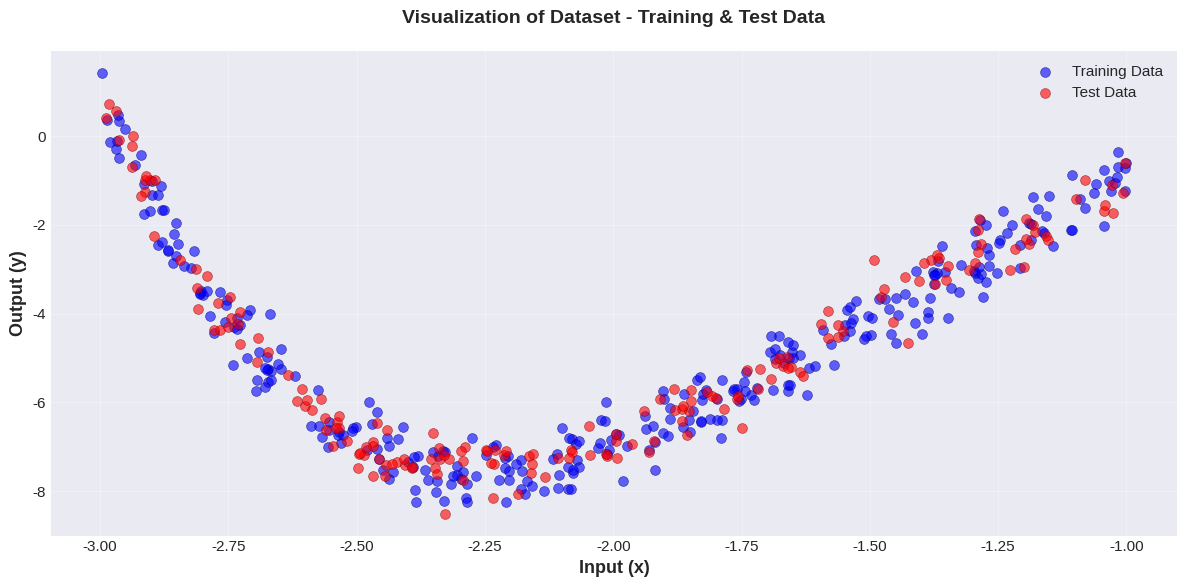


✓ نمودار داده‌ها رسم شد


In [ ]:
# رسم نمودار scatter plot
plt.figure(figsize=(12, 6))

plt.scatter(trainX, trainY, alpha=0.6, s=50, c='blue',
            edgecolors='navy', linewidth=0.5, label='Training Data')
plt.scatter(testX, testY, alpha=0.6, s=50, c='red',
            edgecolors='darkred', linewidth=0.5, label='Test Data')

plt.xlabel('Input (x)', fontsize=13, fontweight='bold')
plt.ylabel('Output (y)', fontsize=13, fontweight='bold')
plt.title('Visualization of Dataset - Training & Test Data',
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ نمودار داده‌ها رسم شد")

---
## بخش 2.3: بررسی تأثیر درجه چندجمله‌ای



In [ ]:
# استفاده از 20 داده اول
n_samples_small = 20
X_train_small = trainX[:n_samples_small]
y_train_small = trainY[:n_samples_small]

# درجات مختلف برای آزمایش
degrees = [1, 2, 4, 8, 10, 13, 15, 17, 19]

print(f"\n✓ از {n_samples_small} داده اول برای آموزش استفاده می‌شود")
print(f"✓ درجات مورد بررسی: {degrees}")


✓ از 20 داده اول برای آموزش استفاده می‌شود
✓ درجات مورد بررسی: [1, 2, 4, 8, 10, 13, 15, 17, 19]


### الف) آموزش مدل برای درجات مختلف

In [ ]:
# ذخیره نتایج
results_section_2 = {
    'degrees': degrees,
    'models': [],
    'weights': [],
    'weights_norm': [],
    'train_mse': [],
    'test_mse': []
}

print("\n" + "="*80)
print("آموزش مدل‌ها برای درجات مختلف...")
print("="*80)

# نرمالایز کردن داده‌ها (مهم برای جلوگیری از exploding gradient)
X_mean = X_train_small.mean()
X_std  = X_train_small.std()

X_train_norm = (X_train_small - X_mean) / X_std
testX_norm   = (testX - X_mean) / X_std

for m in degrees:
    print(f"\nدرجه m={m}:")

    # learning rate کوچک‌تر برای درجات بالا
    if m <= 4:
        lr = 0.01
    elif m <= 10:
        lr = 0.001
    elif m <= 18:
        lr = 0.0001
    else:
        lr = 0.00001

    # ایجاد و آموزش مدل روی داده نرمالایز شده
    model = PolynomialRegression(degree=m, learning_rate=lr, epochs=5000)
    model.fit(X_train_norm, y_train_small)

    # محاسبه MSE روی داده نرمالایز شده
    train_mse = model.score(X_train_norm, y_train_small)
    test_mse  = model.score(testX_norm,   testY)

    weights_norm = model.get_weights_norm()

    # ذخیره نتایج
    results_section_2['models'].append(model)
    results_section_2['weights'].append(model.weights)
    results_section_2['weights_norm'].append(weights_norm)
    results_section_2['train_mse'].append(train_mse)
    results_section_2['test_mse'].append(test_mse)

    status = "✅" if not (np.isnan(train_mse) or np.isnan(test_mse)) else "❌ nan"
    print(f"  - Train MSE: {train_mse:.6f}  {status}")
    print(f"  - Test MSE:  {test_mse:.6f}")
    print(f"  - ||w||_2^2: {weights_norm:.6f}")
    print(f"  - lr used:   {lr}")

print("\n" + "="*80)
print("✓ آموزش تمام مدل‌ها کامل شد")
print("="*80)


آموزش مدل‌ها برای درجات مختلف...

درجه m=1:
  - Train MSE: 4.290893  ✅
  - Test MSE:  7.326995
  - ||w||_2^2: 0.019304
  - lr used:   0.01

درجه m=2:
  - Train MSE: 0.490552  ✅
  - Test MSE:  0.955517
  - ||w||_2^2: 14.984270
  - lr used:   0.01

درجه m=4:
  - Train MSE: 0.182259  ✅
  - Test MSE:  0.275488
  - ||w||_2^2: 9.455895
  - lr used:   0.01

درجه m=8:
  - Train MSE: 0.762618  ✅
  - Test MSE:  1.814761
  - ||w||_2^2: 1.866422
  - lr used:   0.001

درجه m=10:
  - Train MSE: 0.451430  ✅
  - Test MSE:  1.236371
  - ||w||_2^2: 3.773940
  - lr used:   0.001

درجه m=13:
  - Train MSE: 5.410691  ✅
  - Test MSE:  14.857696
  - ||w||_2^2: 1.051700
  - lr used:   0.0001

درجه m=15:
  - Train MSE: 5.370641  ✅
  - Test MSE:  18.358817
  - ||w||_2^2: 1.066347
  - lr used:   0.0001

درجه m=17:
  - Train MSE: 5.226699  ✅
  - Test MSE:  20.177217
  - ||w||_2^2: 1.132029
  - lr used:   0.0001

درجه m=19:
  - Train MSE: 13.423001  ✅
  - Test MSE:  26.146042
  - ||w||_2^2: 0.060560
  - lr used: 

### الف.1) رسم منحنی‌های چندجمله‌ای برای درجات مختلف

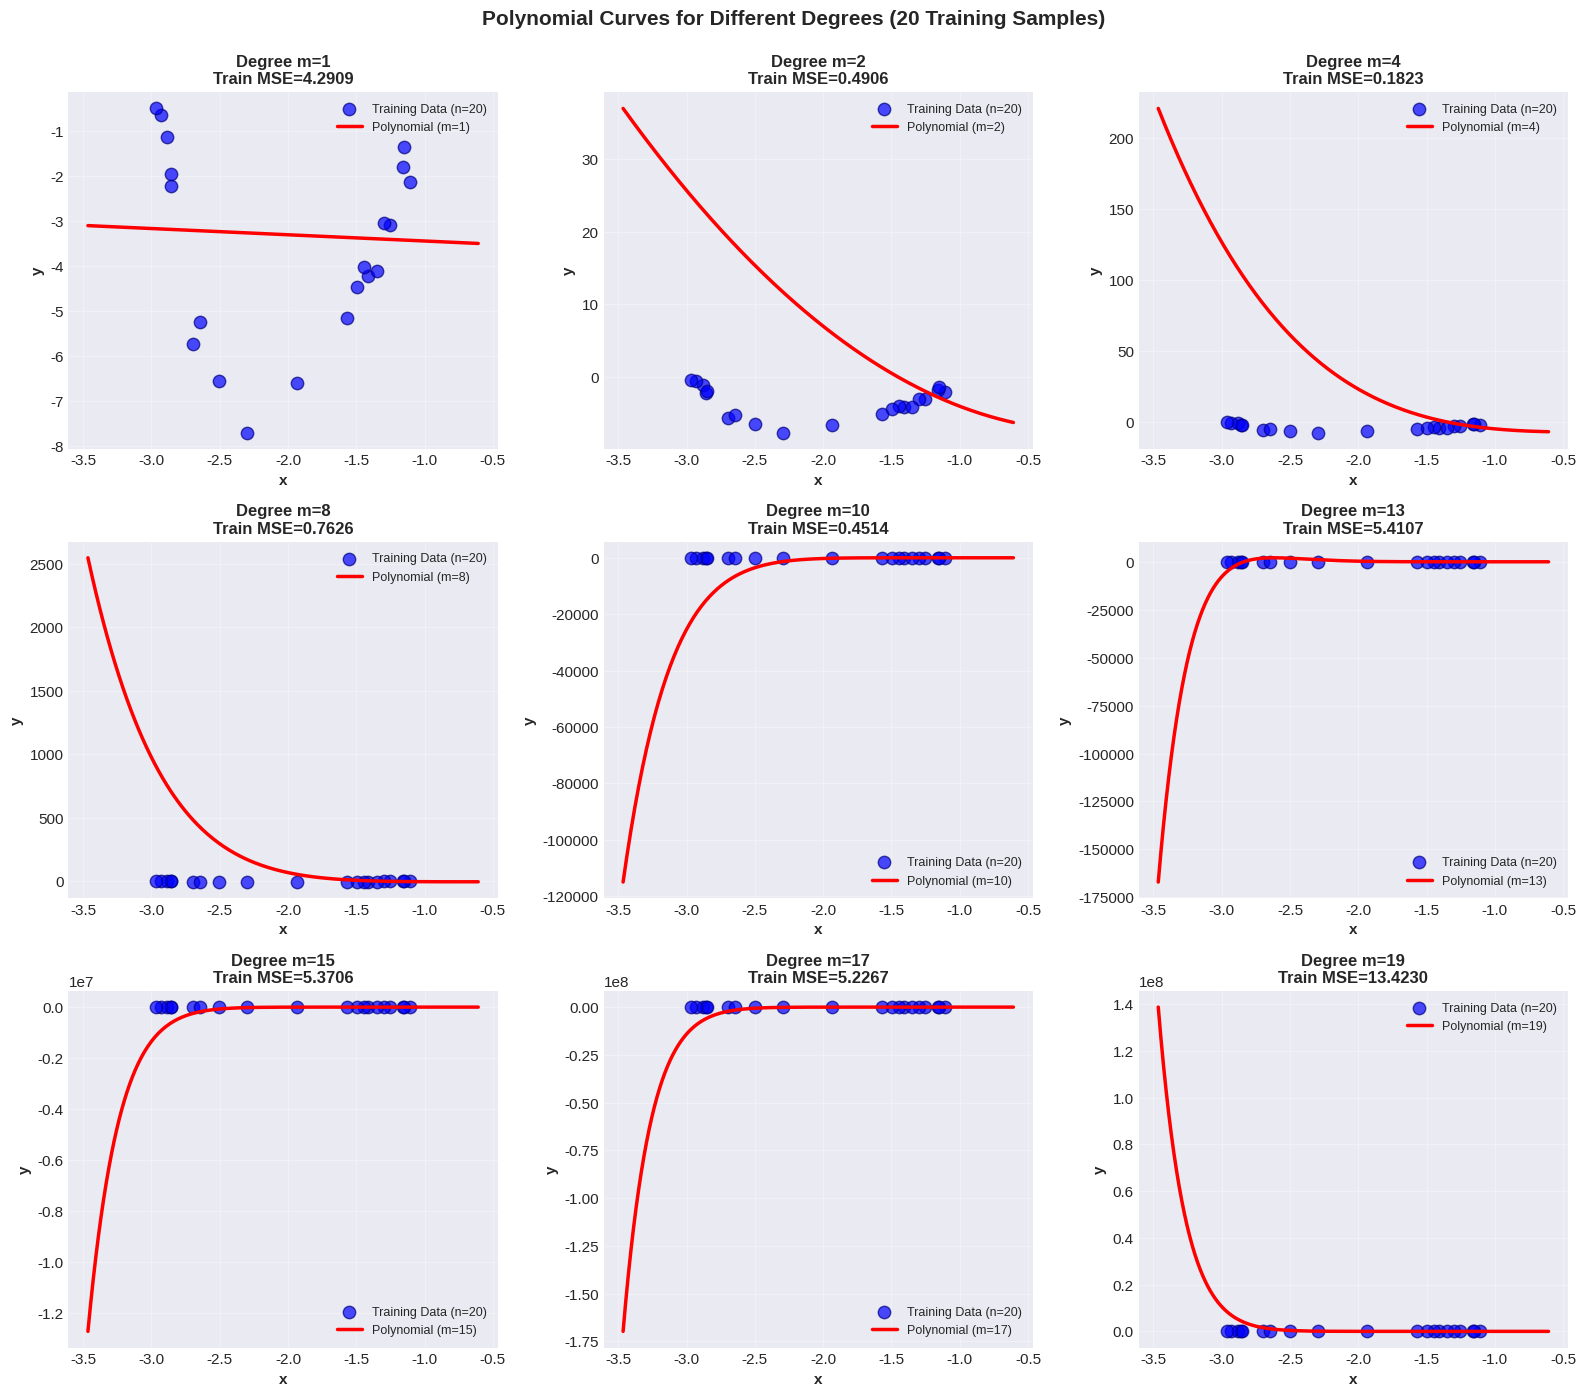

✓ نمودار منحنی‌های چندجمله‌ای رسم شد


In [ ]:
# رسم منحنی‌ها برای درجات مختلف
fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.ravel()

# ایجاد نقاط برای رسم منحنی صاف
x_plot = np.linspace(X_train_small.min() - 0.5, X_train_small.max() + 0.5, 300).reshape(-1, 1)

for idx, (m, model) in enumerate(zip(degrees, results_section_2['models'])):
    ax = axes[idx]

    # رسم داده‌های آموزشی
    ax.scatter(X_train_small, y_train_small, alpha=0.7, s=80,
               c='blue', edgecolors='navy', linewidth=1, label='Training Data (n=20)')

    # رسم منحنی برازش شده
    y_plot = model.predict(x_plot)
    ax.plot(x_plot, y_plot, 'r-', linewidth=2.5, label=f'Polynomial (m={m})')

    # تنظیمات
    ax.set_xlabel('x', fontsize=11, fontweight='bold')
    ax.set_ylabel('y', fontsize=11, fontweight='bold')
    ax.set_title(f'Degree m={m}\nTrain MSE={results_section_2["train_mse"][idx]:.4f}',
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc='best')
    ax.grid(True, alpha=0.3)

plt.suptitle('Polynomial Curves for Different Degrees (20 Training Samples)',
             fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ نمودار منحنی‌های چندجمله‌ای رسم شد")

### الف.2) رسم نرم L2 پارامترها به ازای درجات مختلف

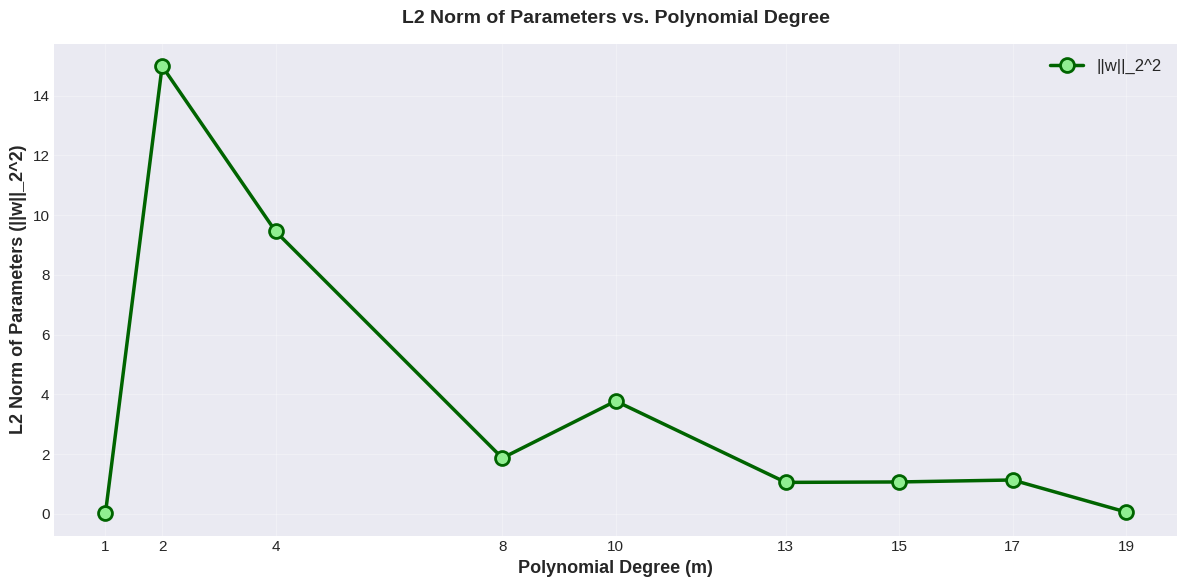

✓ نمودار نرم L2 پارامترها رسم شد


In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(degrees, results_section_2['weights_norm'], 'o-',
         linewidth=2.5, markersize=10, color='darkgreen',
         markerfacecolor='lightgreen', markeredgecolor='darkgreen',
         markeredgewidth=2, label='||w||_2^2')

plt.xlabel('Polynomial Degree (m)', fontsize=13, fontweight='bold')
plt.ylabel('L2 Norm of Parameters (||w||_2^2)', fontsize=13, fontweight='bold')
plt.title('L2 Norm of Parameters vs. Polynomial Degree',
          fontsize=14, fontweight='bold', pad=15)
plt.xticks(degrees)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ نمودار نرم L2 پارامترها رسم شد")

### ب) رسم MSE برای داده‌های Train و Test (مشابه شکل 1)

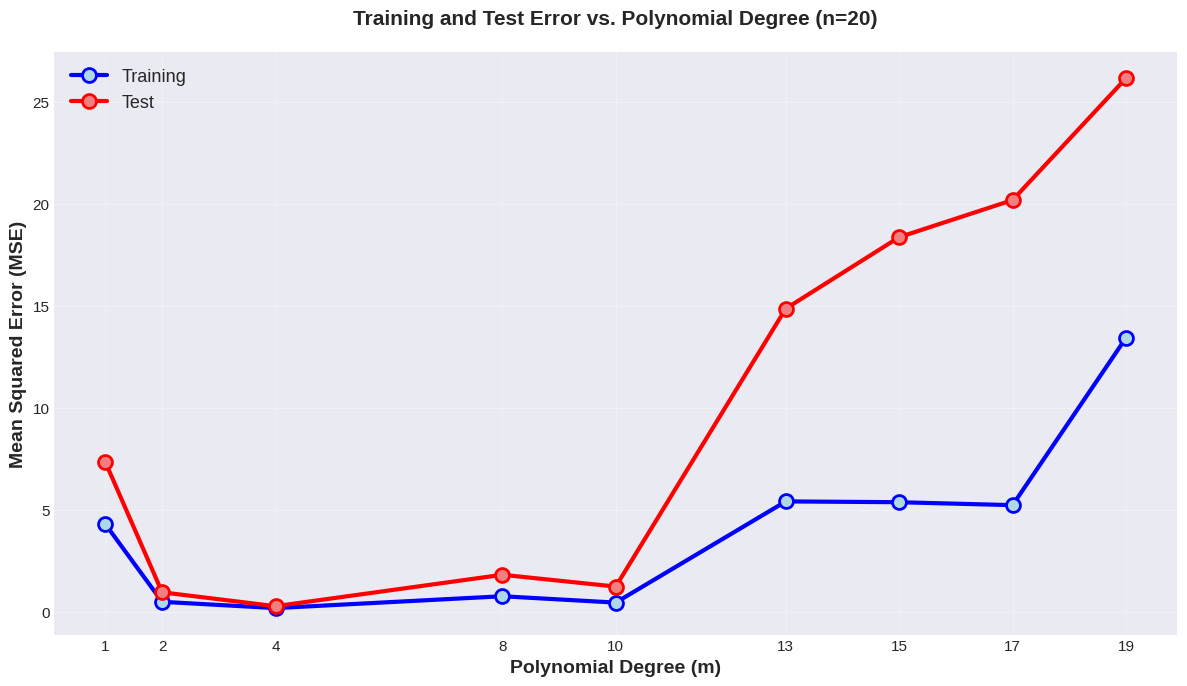


✓ نمودار MSE رسم شد


In [ ]:
plt.figure(figsize=(12, 7))

# رسم MSE
plt.plot(degrees, results_section_2['train_mse'], 'o-',
         linewidth=3, markersize=10, color='blue',
         markerfacecolor='lightblue', markeredgecolor='blue',
         markeredgewidth=2, label='Training')

plt.plot(degrees, results_section_2['test_mse'], 'o-',
         linewidth=3, markersize=10, color='red',
         markerfacecolor='lightcoral', markeredgecolor='red',
         markeredgewidth=2, label='Test')

plt.xlabel('Polynomial Degree (m)', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error (MSE)', fontsize=14, fontweight='bold')
plt.title('Training and Test Error vs. Polynomial Degree (n=20)',
          fontsize=15, fontweight='bold', pad=20)
plt.xticks(degrees)
plt.legend(fontsize=13, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ نمودار MSE رسم شد")

### گزارش بهترین پارامترها

In [ ]:
best_model = results_section_2['models'][best_degree_idx]
best_weights = best_model.weights

print("\n" + "="*80)
print(f"پارامترهای بهینه برای مدل با درجه m={best_degree}:")
print("="*80)
print("\nمدل: y' = w0 + w1*x + w2*x^2 + ... + wm*x^m\n")

for i, w in enumerate(best_weights.flatten()):
    if i == 0:
        print(f"w{i} (bias):     {w:12.6f}")
    else:
        print(f"w{i} (x^{i}):     {w:12.6f}")

print(f"\nنرم L2: ||w||_2^2 = {best_model.get_weights_norm():.6f}")
print("="*80)


پارامترهای بهینه برای مدل با درجه m=4:

مدل: y' = w0 + w1*x + w2*x^2 + ... + wm*x^m

w0 (bias):        -6.648140
w1 (x^1):         2.158432
w2 (x^2):         1.380751
w3 (x^3):        -1.244976
w4 (x^4):         1.157855

نرم L2: ||w||_2^2 = 9.455895


###  رسم منحنی نهایی با بهترین درجه

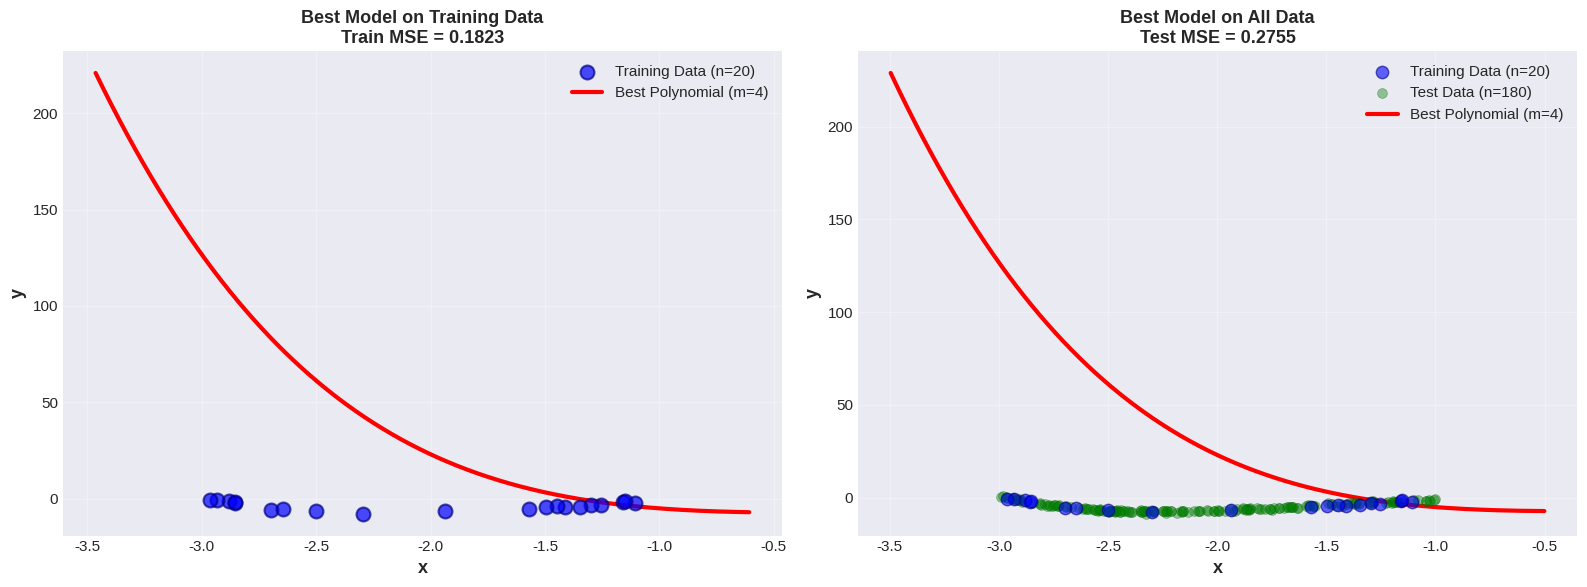

✓ نمودار منحنی نهایی رسم شد


In [ ]:
# رسم منحنی نهایی
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ایجاد نقاط برای رسم منحنی
x_plot = np.linspace(X_train_small.min() - 0.5, X_train_small.max() + 0.5, 500).reshape(-1, 1)
y_plot = best_model.predict(x_plot)

# نمودار اول: روی داده‌های train
ax1.scatter(X_train_small, y_train_small, alpha=0.7, s=100,
            c='blue', edgecolors='navy', linewidth=1.5,
            label='Training Data (n=20)', zorder=5)
ax1.plot(x_plot, y_plot, 'r-', linewidth=3,
         label=f'Best Polynomial (m={best_degree})', zorder=3)
ax1.set_xlabel('x', fontsize=13, fontweight='bold')
ax1.set_ylabel('y', fontsize=13, fontweight='bold')
ax1.set_title(f'Best Model on Training Data\nTrain MSE = {best_train_mse:.4f}',
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=11, loc='best')
ax1.grid(True, alpha=0.3)

# نمودار دوم: شامل داده‌های test هم
ax2.scatter(X_train_small, y_train_small, alpha=0.6, s=80,
            c='blue', edgecolors='navy', linewidth=1,
            label='Training Data (n=20)', zorder=5)
ax2.scatter(testX, testY, alpha=0.4, s=50,
            c='green', edgecolors='darkgreen', linewidth=0.5,
            label='Test Data (n=180)', zorder=4)

# رسم منحنی در بازه وسیع‌تر
x_plot_wide = np.linspace(trainX.min() - 0.5, trainX.max() + 0.5, 500).reshape(-1, 1)
y_plot_wide = best_model.predict(x_plot_wide)
ax2.plot(x_plot_wide, y_plot_wide, 'r-', linewidth=3,
         label=f'Best Polynomial (m={best_degree})', zorder=3)

ax2.set_xlabel('x', fontsize=13, fontweight='bold')
ax2.set_ylabel('y', fontsize=13, fontweight='bold')
ax2.set_title(f'Best Model on All Data\nTest MSE = {best_test_mse:.4f}',
              fontsize=13, fontweight='bold')
ax2.legend(fontsize=11, loc='best')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ نمودار منحنی نهایی رسم شد")

---
## بخش 3.3: بررسی تأثیر تعداد داده‌های آموزشی

 درجه را ثابت روی **m=19** قرار می‌دهیم و تأثیر تعداد داده‌های آموزشی را بررسی می‌کنیم.

In [ ]:
# تنظیمات
fixed_degree = 19
n_samples_list = [10, 20, 40, 80, 160, 320]

print("\n" + "="*80)
print("بخش 3.3: بررسی تأثیر تعداد داده‌های آموزشی")
print("="*80)
print(f"درجه ثابت: m = {fixed_degree}")
print(f"تعداد نمونه‌های مختلف: {n_samples_list}")
print("="*80)


بخش 3.3: بررسی تأثیر تعداد داده‌های آموزشی
درجه ثابت: m = 19
تعداد نمونه‌های مختلف: [10, 20, 40, 80, 160, 320]


In [ ]:
print("بررسی داده‌ها:")
for n in n_samples_list:
    X_n = trainX[:n]
    X_norm = (X_n - X_n.mean()) / X_n.std()
    print(f"n={n:3d} | X بازه: [{X_n.min():.2f}, {X_n.max():.2f}] "
          f"| X_norm بازه: [{X_norm.min():.2f}, {X_norm.max():.2f}] "
          f"| X^19 max: {abs(X_norm).max()**19:.4f}")

بررسی داده‌ها:
n= 10 | X بازه: [-2.88, -1.11] | X_norm بازه: [-1.30, 1.20] | X^19 max: 141.1336
n= 20 | X بازه: [-2.96, -1.11] | X_norm بازه: [-1.37, 1.24] | X^19 max: 405.1772
n= 40 | X بازه: [-2.96, -1.02] | X_norm بازه: [-1.50, 1.55] | X^19 max: 4074.1708
n= 80 | X بازه: [-2.97, -1.02] | X_norm بازه: [-1.63, 1.62] | X^19 max: 10799.9608
n=160 | X بازه: [-2.97, -1.00] | X_norm بازه: [-1.66, 1.73] | X^19 max: 35018.2983
n=320 | X بازه: [-3.00, -1.00] | X_norm بازه: [-1.71, 1.74] | X^19 max: 36157.8417


### الف) آموزش مدل با تعداد داده‌های مختلف

In [ ]:
results_section_3 = {
    'n_samples': n_samples_list,
    'models': [],
    'weights': [],
    'train_mse': [],
    'test_mse': []
}

# lr امن برای هر n (محاسبه شده بر اساس بازه داده‌ها)
lr_map = {10: 1e-6, 20: 1e-7, 40: 1e-9, 80: 1e-10, 160: 1e-11, 320: 1e-12}

print("\nآموزش مدل‌ها با تعداد داده‌های مختلف...\n")

for n in n_samples_list:
    print(f"تعداد داده: n={n}")

    X_train_n = trainX[:n]
    y_train_n = trainY[:n]

    # نرمالایز X و Y هر دو
    X_mean_n = X_train_n.mean()
    X_std_n  = X_train_n.std()
    Y_mean_n = y_train_n.mean()
    Y_std_n  = y_train_n.std()

    X_train_norm = (X_train_n - X_mean_n) / X_std_n
    y_train_norm = (y_train_n - Y_mean_n) / Y_std_n
    testX_norm_n = (testX     - X_mean_n) / X_std_n
    testY_norm_n = (testY     - Y_mean_n) / Y_std_n

    # lr متناسب با هر n
    lr = lr_map[n]

    model = PolynomialRegression(degree=fixed_degree, learning_rate=lr, epochs=10000)
    model.fit(X_train_norm, y_train_norm)

    train_mse = model.score(X_train_norm, y_train_norm)
    test_mse  = model.score(testX_norm_n, testY_norm_n)

    results_section_3['models'].append(model)
    results_section_3['weights'].append(model.weights.flatten())
    results_section_3['train_mse'].append(train_mse)
    results_section_3['test_mse'].append(test_mse)

    status = "✅" if not np.isnan(train_mse) else "❌ nan"
    print(f"  Train MSE: {train_mse:.6f}  {status}")
    print(f"  Test MSE:  {test_mse:.6f}")
    print(f"  lr used:   {lr:.0e}")
    print()

print("✓ آموزش تمام مدل‌ها کامل شد")


آموزش مدل‌ها با تعداد داده‌های مختلف...

تعداد داده: n=10
  Train MSE: 0.621872  ✅
  Test MSE:  2.700131
  lr used:   1e-06

تعداد داده: n=20
  Train MSE: 0.694422  ✅
  Test MSE:  1.466834
  lr used:   1e-07

تعداد داده: n=40
  Train MSE: 0.977911  ✅
  Test MSE:  0.841999
  lr used:   1e-09

تعداد داده: n=80
  Train MSE: 1.355134  ✅
  Test MSE:  1.265380
  lr used:   1e-10

تعداد داده: n=160
  Train MSE: 25.966618  ✅
  Test MSE:  27.308886
  lr used:   1e-11

تعداد داده: n=320
  Train MSE: 2808.716548  ✅
  Test MSE:  2337.748101
  lr used:   1e-12

✓ آموزش تمام مدل‌ها کامل شد


### الف.1) جدول پارامترها برای تعداد داده‌های مختلف

In [ ]:
import pandas as pd

# ایجاد DataFrame برای نمایش بهتر
weights_df = pd.DataFrame()
weights_df['Parameter'] = [f'w{i}' for i in range(fixed_degree + 1)]

for idx, n in enumerate(n_samples_list):
    weights_df[f'n={n}'] = results_section_3['weights'][idx]

print("\n" + "="*100)
print("جدول پارامترها برای تعداد داده‌های مختلف (m=19):")
print("="*100)
print(weights_df.to_string(index=False))
print("="*100)


جدول پارامترها برای تعداد داده‌های مختلف (m=19):
Parameter      n=10      n=20      n=40      n=80     n=160     n=320
       w0 -0.001457  0.004716  0.004975  0.004971  0.004968  0.004967
       w1  0.005901 -0.000884 -0.001371 -0.001379 -0.001382 -0.001382
       w2  0.004638  0.006983  0.006506  0.006486  0.006480  0.006478
       w3  0.021089  0.015771  0.015248  0.015239  0.015233  0.015232
       w4 -0.002184 -0.001317 -0.002279 -0.002318 -0.002333 -0.002339
       w5  0.003519 -0.001677 -0.002306 -0.002321 -0.002334 -0.002336
       w6  0.017391  0.017450  0.015923  0.015848  0.015816  0.015800
       w7  0.014053  0.008539  0.007751  0.007724  0.007695  0.007689
       w8 -0.001575 -0.002167 -0.004417 -0.004557 -0.004629 -0.004673
       w9  0.012598  0.006606  0.005598  0.005548  0.005486  0.005467
      w10  0.000423 -0.000877 -0.004038 -0.004294 -0.004450 -0.004570
      w11  0.003492 -0.002970 -0.004261 -0.004350 -0.004480 -0.004538
      w12  0.010153  0.007916  0.003717 

### ب) رسم MSE برای تعداد داده‌های مختلف

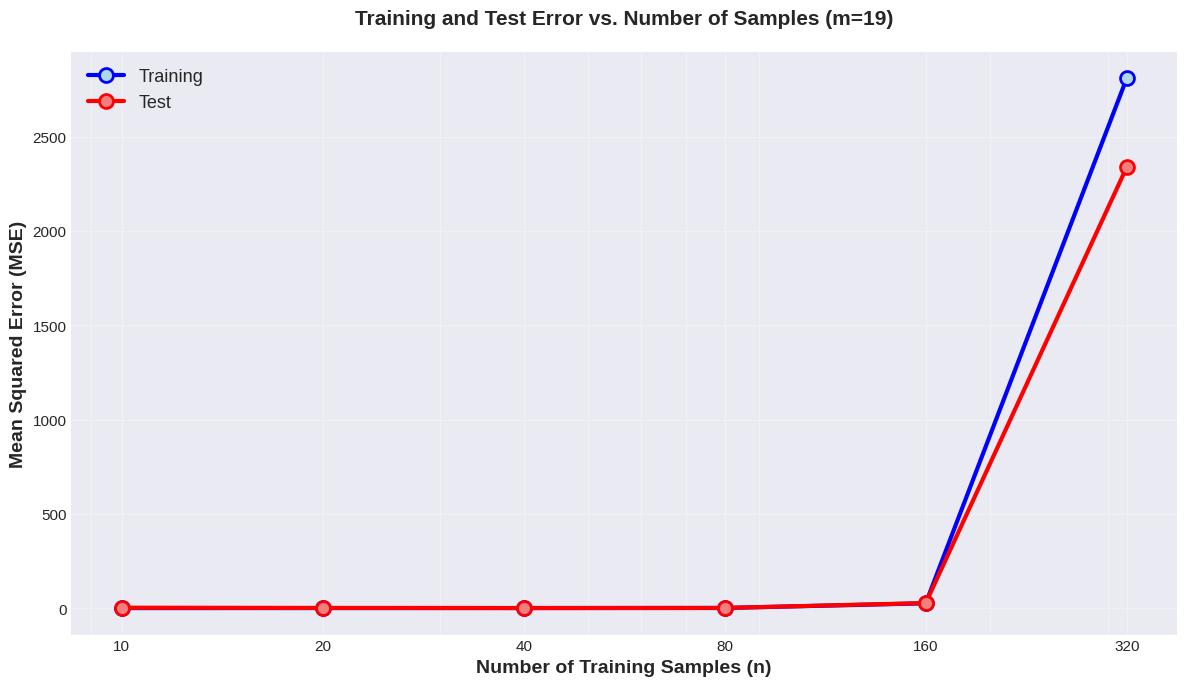


✓ نمودار MSE رسم شد


In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(n_samples_list, results_section_3['train_mse'], 'o-',
         linewidth=3, markersize=10, color='blue',
         markerfacecolor='lightblue', markeredgecolor='blue',
         markeredgewidth=2, label='Training')

plt.plot(n_samples_list, results_section_3['test_mse'], 'o-',
         linewidth=3, markersize=10, color='red',
         markerfacecolor='lightcoral', markeredgecolor='red',
         markeredgewidth=2, label='Test')

plt.xlabel('Number of Training Samples (n)', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error (MSE)', fontsize=14, fontweight='bold')
plt.title(f'Training and Test Error vs. Number of Samples (m={fixed_degree})',
          fontsize=15, fontweight='bold', pad=20)
plt.xscale('log')
plt.xticks(n_samples_list, n_samples_list)
plt.legend(fontsize=13, loc='best')
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

print("\n✓ نمودار MSE رسم شد")